In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

/home/lpahl/anaconda3/envs/VIZ/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#download the data
!wget -O ONE_card_rating.csv data.csv https://www.17lands.com/2b021390-7673-44bf-bd3c-3abc8c5533df

--2023-03-06 13:33:15--  http://data.csv/
Resolving data.csv (data.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘data.csv’
--2023-03-06 13:33:15--  https://www.17lands.com/2b021390-7673-44bf-bd3c-3abc8c5533df
Resolving www.17lands.com (www.17lands.com)... 52.72.234.255
Connecting to www.17lands.com (www.17lands.com)|52.72.234.255|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6668 (6.5K) [text/html]
Saving to: ‘ONE_card_rating.csv’

ONE_card_rating.csv 100%[===================>]   6.51K  --.-KB/s    in 0s      

2023-03-06 13:33:16 (1.24 GB/s) - ‘ONE_card_rating.csv’ saved [6668/6668]

FINISHED --2023-03-06 13:33:16--
Total wall clock time: 1.0s
Downloaded: 1 files, 6.5K in 0s (1.24 GB/s)


In [3]:
pd.set_option("display.max_columns",10000)
pd.set_option("display.max_rows",10000)

In [4]:
df = pd.read_csv("../data/ONE_card_rating.csv")

In [5]:
df.head()

,Name,Color,Rarity,# Seen,ALSA,# Picked,ATA,# GP,GP WR,# OH,OH WR,# GD,GD WR,# GIH,GIH WR,# GNS,GNS WR,IWD
0,Sword of Forge and Frontier,NaN,M,2345,1.05,2252,1.05,13533,56.0%,2367,58.9%,3009,59.3%,5376,59.1%,8098,53.8%,5.3pp
1,"Vraska, Betrayal's Sting",B,M,2425,1.10,2087,1.09,10948,53.8%,1817,55.2%,2549,59.5%,4366,57.7%,6521,50.9%,6.8pp
2,The Eternal Wanderer,W,R,5028,1.16,4427,1.15,24795,58.2%,4181,62.9%,5753,66.1%,9934,64.8%,14789,53.7%,11.1pp
3,"Nissa, Ascended Animist",G,M,2558,1.16,2178,1.15,11594,58.0%,1913,63.9%,2689,68.6%,4602,66.7%,6957,52.1%,14.5pp
4,"Elesh Norn, Mother of Machines",W,M,2526,1.16,2172,1.15,11930,57.5%,1972,62.1%,2671,62.6%,4643,62.4%,7248,54.3%,8.1pp


In [6]:
df["Color"] = df["Color"].fillna("C")

In [7]:
df.Color.value_counts()

U       40
R       40
G       40
B       40
C       40
W       39
UB       3
RG       3
WR       3
WB       3
BG       3
UG       2
WU       2
BR       2
WG       2
UR       2
WUBG     1
Name: Color, dtype: int64

In [8]:
#TODO groupby pick order and check average winrate and IWD at each pick, check deviation from norm
#TODO check correaltion betwen pick order and winrate
#TODO plot pick order and winrate per card

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      265 non-null    object 
 1   Color     265 non-null    object 
 2   Rarity    265 non-null    object 
 3   # Seen    265 non-null    int64  
 4   ALSA      265 non-null    float64
 5   # Picked  265 non-null    int64  
 6   ATA       265 non-null    float64
 7   # GP      265 non-null    int64  
 8   GP WR     259 non-null    object 
 9   # OH      265 non-null    int64  
 10  OH WR     259 non-null    object 
 11  # GD      265 non-null    int64  
 12  GD WR     259 non-null    object 
 13  # GIH     265 non-null    int64  
 14  GIH WR    261 non-null    object 
 15  # GNS     265 non-null    int64  
 16  GNS WR    263 non-null    object 
 17  IWD       261 non-null    object 
dtypes: float64(2), int64(7), object(9)
memory usage: 37.4+ KB


In [10]:
#we have missing data in column GD WR which I want to use, let's check it out
df[df["GD WR"].isna() == True]

,Name,Color,Rarity,# Seen,ALSA,# Picked,ATA,# GP,GP WR,# OH,OH WR,# GD,GD WR,# GIH,GIH WR,# GNS,GNS WR,IWD
134,Ichormoon Gauntlet,U,M,9725,4.27,1377,6.05,397,NaN,66,NaN,92,NaN,158,NaN,237,50.6%,NaN
171,Mindsplice Apparatus,U,R,23300,5.05,2846,7.76,530,NaN,76,NaN,144,NaN,220,35.0%,310,42.9%,-7.9pp
186,Monument to Perfection,C,R,26780,5.54,3302,8.51,497,NaN,82,NaN,115,NaN,197,NaN,296,41.6%,NaN
189,Encroaching Mycosynth,U,R,26589,5.65,3322,8.64,490,NaN,89,NaN,116,NaN,205,38.5%,285,42.8%,-4.3pp
204,Mirran Safehouse,C,R,29435,6.17,3852,9.20,27,NaN,5,NaN,4,NaN,9,NaN,18,NaN,NaN
263,Minor Misstep,U,U,92180,8.55,10396,12.26,82,NaN,10,NaN,18,NaN,28,NaN,54,NaN,NaN


The cards with no winrate have very few games were they are actually played which is probably the reason why the winrate is null. We can drop them safely, although there is a risk that we are dropping card that are undervalued we lack data to evaluate those cards correctly.

In [11]:
#reducing the dataframe to relevant columns
df = df[["Name", "Color", "Rarity", "ATA", "GD WR", "IWD"]]

In [12]:
df = df.dropna()

In [13]:
#converting the win rate and increase win rate to float
df["GD WR"] = df["GD WR"].apply(lambda x: float(x[:-1]))
df["IWD"] = df["IWD"].apply(lambda x: float(x[:-2]))

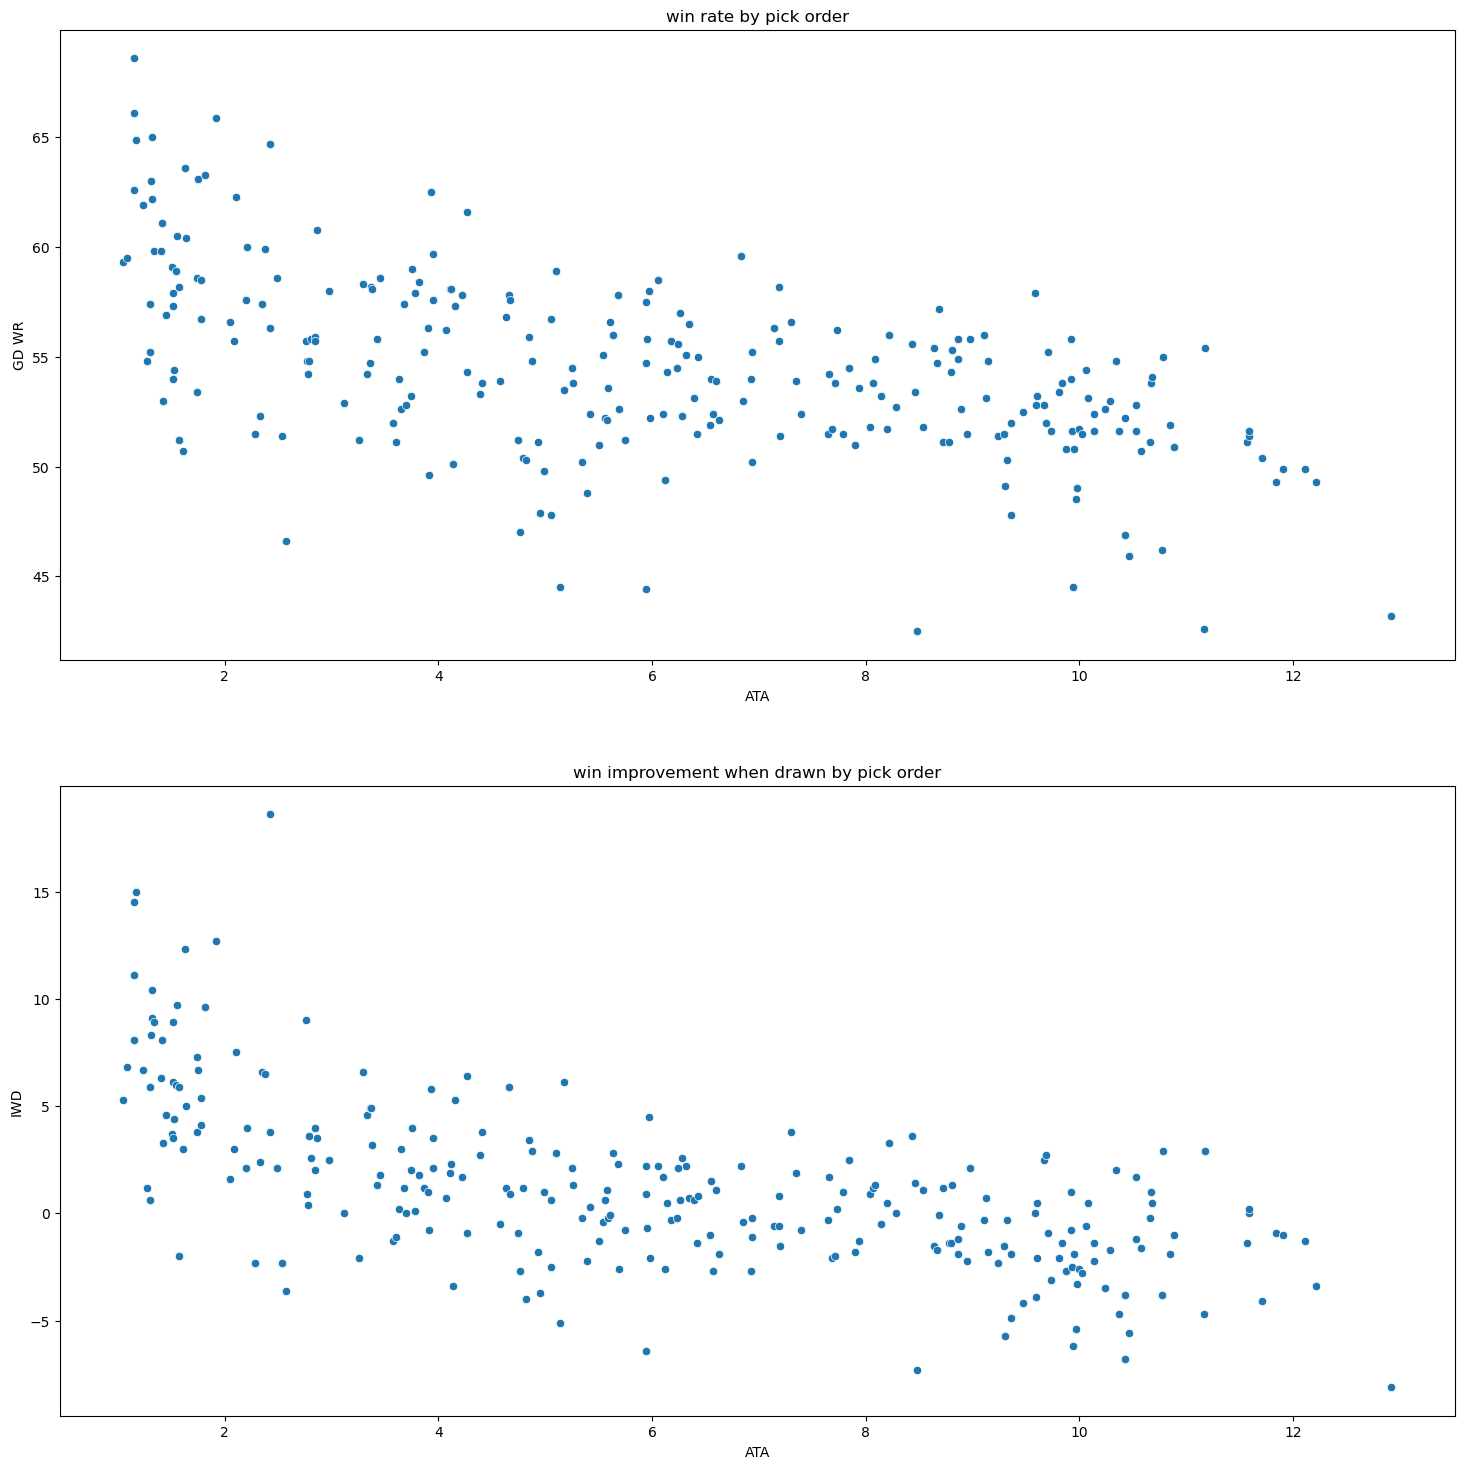

In [14]:
#plot of win rate over pick order
fig, ax = plt.subplots(nrows=2, figsize=(18,18))
sns.scatterplot(data=df, x="ATA", y="GD WR", ax=ax[0])
ax[0].set(title="win rate by pick order")
sns.scatterplot(data=df, x="ATA", y="IWD", ax=ax[1])
ax[1].set(title="win improvement when drawn by pick order")
plt.show()


A simple plot shows that we have visual outliers. Let's outline them using the interquartile range for each pick order.

In [15]:
df["rounded_pick_order"] = df["ATA"].apply(lambda x: round(x, 0))

In [16]:
q1 = df.groupby("rounded_pick_order")[["GD WR", "IWD"]].quantile(0.25)
q3 = df.groupby("rounded_pick_order")[["GD WR", "IWD"]].quantile(0.75)

In [17]:
quartile = pd.merge(q1, q3, left_on="rounded_pick_order", right_on="rounded_pick_order", suffixes=('_q1', '_q3'))

In [18]:
df = pd.merge(df, quartile, left_on='rounded_pick_order', right_on='rounded_pick_order')

In [19]:
df.columns

Index(['Name', 'Color', 'Rarity', 'ATA', 'GD WR', 'IWD', 'rounded_pick_order',
       'GD WR_q1', 'IWD_q1', 'GD WR_q3', 'IWD_q3'],
      dtype='object')

In [20]:
df["IWD_iqr"] = df["IWD_q3"] - df["IWD_q1"]
df["GD WR_iqr"] = df["GD WR_q3"] - df["GD WR_q1"]

In [21]:
def is_outlier(df, col, q1_col, q3_col, iqr_col):
    
    if df[col] > df[q3_col] + df[iqr_col] * 1.5 or df[col] < df[q1_col] - df[iqr_col] * 1.5:
        return True
    else:
        return False
    
df["IWD_outlier"] = df.apply(is_outlier, args=("IWD", "IWD_q1","IWD_q3", "IWD_iqr",), axis=1)
df["GD_WR_outlier"] = df.apply(is_outlier, args=("GD WR", "GD WR_q1", "GD WR_q3", "GD WR_iqr"), axis=1)

In [22]:
df[df["IWD_outlier"] == True]

,Name,Color,Rarity,ATA,GD WR,IWD,rounded_pick_order,GD WR_q1,IWD_q1,GD WR_q3,IWD_q3,IWD_iqr,GD WR_iqr,IWD_outlier,GD_WR_outlier
3,"Nissa, Ascended Animist",G,M,1.15,68.6,14.5,1.0,57.875,5.450,62.900,9.050,3.600,5.025,True,False
5,"Sheoldred, the Apocalypse",B,M,1.17,64.9,15.0,1.0,57.875,5.450,62.900,9.050,3.600,5.025,True,False
36,"Migloz, Maze Crusher",RG,R,1.92,65.9,12.7,2.0,56.000,3.250,60.200,7.000,3.750,4.200,True,False
46,"Atraxa, Grand Unifier",WUBG,M,2.42,64.7,18.6,2.0,56.000,3.250,60.200,7.000,3.750,4.200,True,False
128,"Geth, Thane of Contracts",B,R,5.94,44.4,-6.4,6.0,52.225,-0.625,55.950,2.000,2.625,3.725,True,True
183,Soulless Jailer,C,R,8.48,42.5,-7.3,8.0,51.700,-0.900,54.350,1.350,2.250,2.650,True,True
202,Veil of Assimilation,W,U,9.30,49.1,-5.7,9.0,51.450,-1.900,55.100,-0.200,1.700,3.650,True,False
204,Noxious Assault,G,U,9.36,47.8,-4.9,9.0,51.450,-1.900,55.100,-0.200,1.700,3.650,True,False
253,Thrill of Possibility,R,C,11.71,50.4,-4.1,12.0,49.750,-1.900,51.175,-0.675,1.225,1.425,True,False


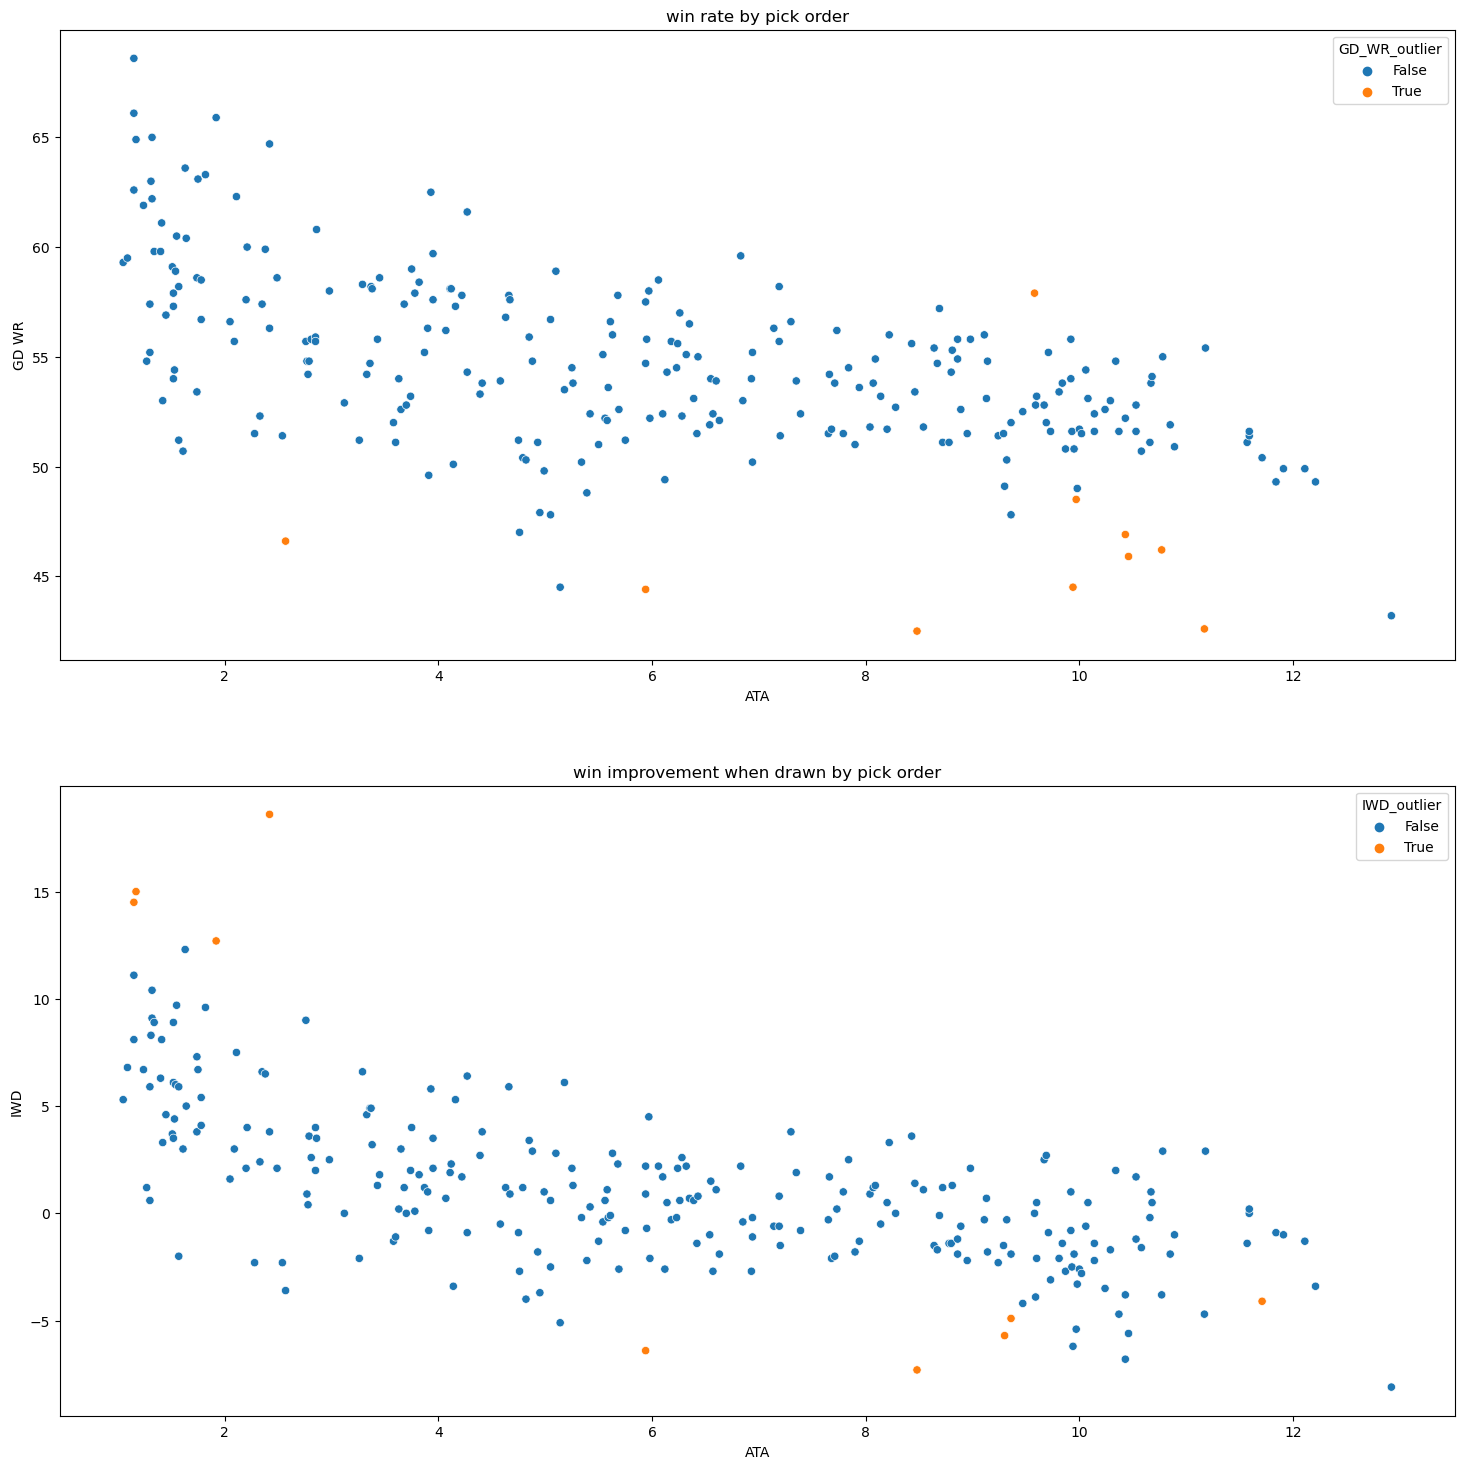

In [23]:
#plot of win rate over pick order
fig, ax = plt.subplots(nrows=2, figsize=(18,18))
sns.scatterplot(data=df, x="ATA", y="GD WR", ax=ax[0], hue="GD_WR_outlier")
ax[0].set(title="win rate by pick order", )
sns.scatterplot(data=df, x="ATA", y="IWD", ax=ax[1], hue="IWD_outlier")
ax[1].set(title="win improvement when drawn by pick order")
plt.show();

Based on this graph we can confirm the presence of outliers. However it's hard to investigate without knowing the name of the cards, let's plot this againg using plotly

In [24]:
df.columns

Index(['Name', 'Color', 'Rarity', 'ATA', 'GD WR', 'IWD', 'rounded_pick_order',
       'GD WR_q1', 'IWD_q1', 'GD WR_q3', 'IWD_q3', 'IWD_iqr', 'GD WR_iqr',
       'IWD_outlier', 'GD_WR_outlier'],
      dtype='object')

In [25]:
fig = px.scatter(df, y="GD WR", x="ATA", color="GD_WR_outlier", hover_name="Name", hover_data=["rounded_pick_order", "ATA", "GD WR_q1", "GD WR_q3"])
fig.update_traces(marker_size=10)
fig.show()
fig.write_html("../graph/GD_WR_outlier.html")

/home/lpahl/anaconda3/envs/VIZ/lib/python3.8/site-packages/google/colab/data_table.py:30: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



In [26]:
fig = px.scatter(df, y="IWD", x="ATA", color="IWD_outlier", hover_name="Name", hover_data=["rounded_pick_order", "ATA", "IWD_q1", "IWD_q3"])
fig.update_traces(marker_size=10)
fig.show()
fig.write_html("../graph/IWD_outlier.html")

Let's compare this graph with graphs that take the iqr for the whole dataset and not grouped by pick order

In [27]:
df[["GD_WR_all_q1", "IWD_all_q1"]] = df[["GD WR", "IWD"]].quantile(0.25)
df[["GD_WR_all_q3", "IWD_all_q3"]] = df[["GD WR", "IWD"]].quantile(0.75)


In [28]:
df.columns

Index(['Name', 'Color', 'Rarity', 'ATA', 'GD WR', 'IWD', 'rounded_pick_order',
       'GD WR_q1', 'IWD_q1', 'GD WR_q3', 'IWD_q3', 'IWD_iqr', 'GD WR_iqr',
       'IWD_outlier', 'GD_WR_outlier', 'GD_WR_all_q1', 'IWD_all_q1',
       'GD_WR_all_q3', 'IWD_all_q3'],
      dtype='object')

In [29]:
df["IWD_all_iqr"] = df["IWD_all_q3"] - df["IWD_all_q1"]
df["GD_WR_all_iqr"] = df["GD_WR_all_q3"] - df["GD_WR_all_q1"]
df["IWD_all_outlier"] = df.apply(is_outlier, args=("IWD", "IWD_all_q1","IWD_all_q3", "IWD_all_iqr",), axis=1)
df["GD_WR_all_outlier"] = df.apply(is_outlier, args=("GD WR", "GD_WR_all_q1", "GD_WR_all_q3", "GD_WR_all_iqr"), axis=1)

In [30]:
fig = px.scatter(df, y="GD WR", x="ATA", color="GD_WR_all_outlier", hover_name="Name", hover_data=["rounded_pick_order", "ATA", "GD_WR_all_q1", "GD_WR_all_q3"])
fig.update_traces(marker_size=10)
fig.show()
fig.write_html("../graph/GD_WR_all_outlier.html")

In [31]:
fig = px.scatter(df, y="IWD", x="ATA", color="IWD_all_outlier", hover_name="Name", hover_data=["rounded_pick_order", "ATA", "IWD_all_q1", "IWD_all_q3"])
fig.update_traces(marker_size=10)
fig.show()
fig.write_html("../graph/IWD_all_outlier.html")

This is not very informative, however we can see that the card "Geth, thane of contracts" is clearly overvalued.

Although using the iqr by pick order for outlier detection is working, we can see that some points gets misqualified based on the arbitrary rounding of pick order because we rounded the value to the nearest whole number. Also, intuitively we would want to highlight more cards, we are not interested only in outliers but also just in cards that are slightly under or overvalued.

In [42]:
df.value_counts("Color")


Color
B       40
G       40
R       40
W       39
C       38
U       36
WR       3
WB       3
UB       3
BG       3
RG       3
UG       2
UR       2
WG       2
BR       2
WU       2
WUBG     1
dtype: int64